In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

(150, 4)


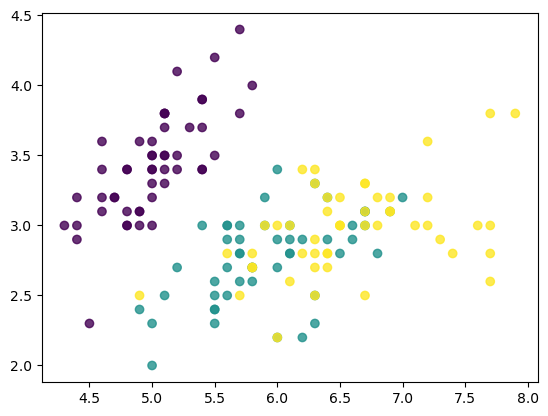

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

print(X.shape)
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.8)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

print('Train set :', X_train.shape)
print('Test set :', X_test.shape)

Train set : (120, 4)
Test set : (30, 4)


Text(0.5, 1.0, 'Test set')

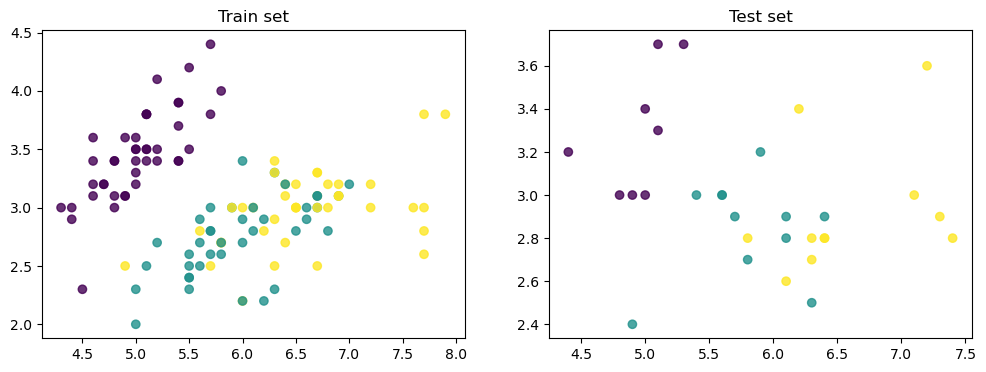

In [6]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.8)
plt.title('Test set')

In [7]:
# loading the model
from sklearn.neighbors import KNeighborsClassifier

In [8]:
# training the model
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

#Evaluating the model
print('Train score :', model.score(X_train, y_train))

#Evaluating the model with the test set
print('Test score :', model.score(X_test, y_test))


Train score : 1.0
Test score : 0.9


#### Cross_validation

In [9]:
# importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

In [10]:
cross_val_score(KNeighborsClassifier(4), X_train, y_train, cv=5, scoring='accuracy').mean()

np.float64(0.9666666666666668)

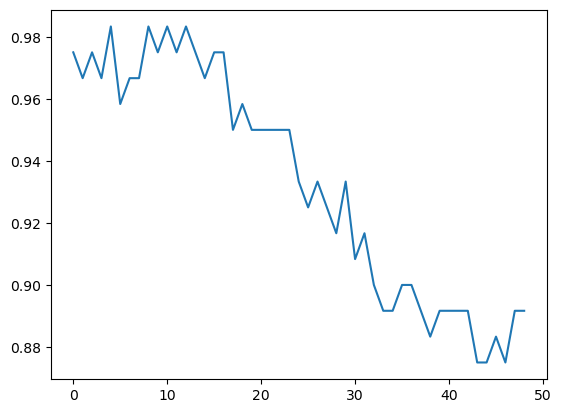

In [11]:
# create a graph using a loop to validate the model
val_score = []
for k in range(1,50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)

In [12]:
# A simple way to create this graph is to use a validation curve


In [13]:
#Import of validation curve
from sklearn.model_selection import validation_curve

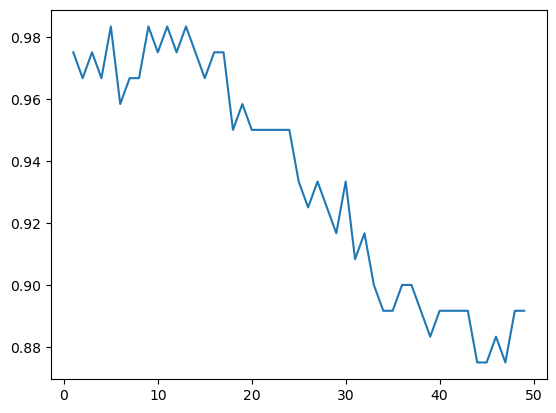

In [14]:
model =  KNeighborsClassifier()
k = np.arange(1, 50)

train_score,val_score = validation_curve(model, X_train, y_train, param_name='n_neighbors', param_range=k, cv=5)

plt.plot(k, val_score.mean(axis=1))
# This allow us to get the graph like before.

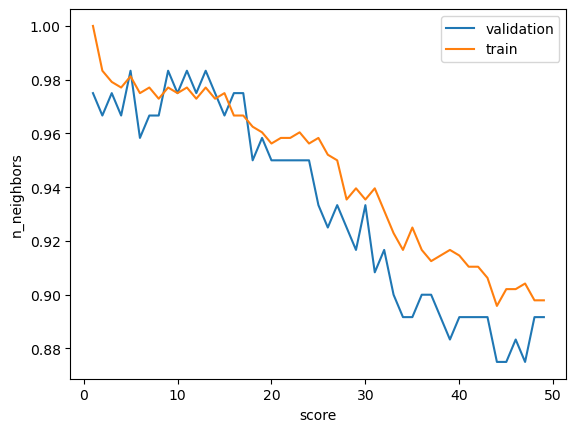

In [16]:
#
model =  KNeighborsClassifier()
k = np.arange(1, 50)

train_score,val_score = validation_curve(model, X_train, y_train, param_name='n_neighbors', param_range=k, cv=5)

plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')
         
plt.xlabel('score')
plt.ylabel('n_neighbors')
plt.legend()

In [25]:
# This graph above is useful for detecting overfitting
# In knearest neighbors, besides n_neighbors, there are others hyperparameters : Manhattan distance, Euclidian distance(coefficients can be set) which tuning can help achieve better performance.
# therefore to combine all these hyperparameters, GridSearchCV is important.
# GridSearchCV enables us to find the model with the best hyperparameters by comparing the performances of each combination using cross-validation technique

In [34]:
#Import of GridSearchCV
from sklearn.model_selection import GridSearchCV

In [39]:
param_grid  = { 'n_neighbors' : np.arange (1,20),
                'metric':['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [41]:
grid.best_score_

np.float64(0.9833333333333334)

In [42]:
# The best score is estimated to 98%

np.float64(0.9833333333333334)

In [43]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': np.int64(5)}

In [44]:
# The best hyperparameter is to euclidean with n_neighbors = 5

In [48]:
#Saving the model
model = grid.best_estimator_

In [49]:
#Model applied to the test set
model.score(X_test, y_test)

0.9333333333333333

In [ ]:
# In doing so, in real life, the performance of the model is estimated to 93% of successful result

In [50]:
#sConfusion matrix could be used to evaluate the performance. It enables to understand errors in the model

In [51]:
#Loading confusion matrix function
from sklearn.metrics import confusion_matrix

In [54]:
confusion_matrix(y_test, model.predict(X_test), )

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]])

In [58]:
# 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

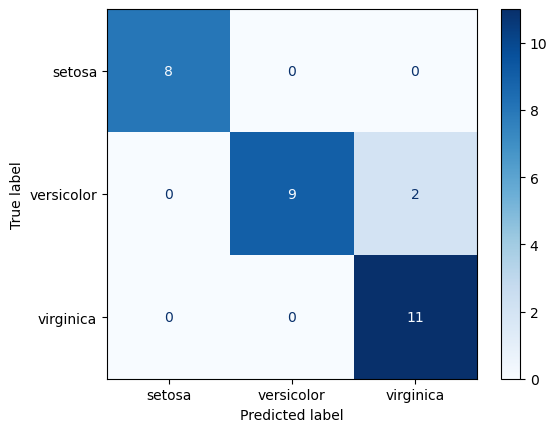

In [74]:
cm = confusion_matrix(y_test, model.predict(X_test), labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=iris.target_names) # or grid.classes_
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Explanations : from top to bottom, in the first line (class), the 8 species were well classified. In the second class (versicolor), 9 species or flowers were classified in the right class and 2 were sent in virginica class (3rd class). Last, according to virginica class, the 11 species were well classified in the corresponding class.

In [75]:
# Can our model improve its performance whether it receives more data?
# Learning_curve may help answer this question.

In [76]:
#import learning_curve function
from sklearn.model_selection import learning_curve

[ 9 19 28 38 48 57 67 76 86 96]


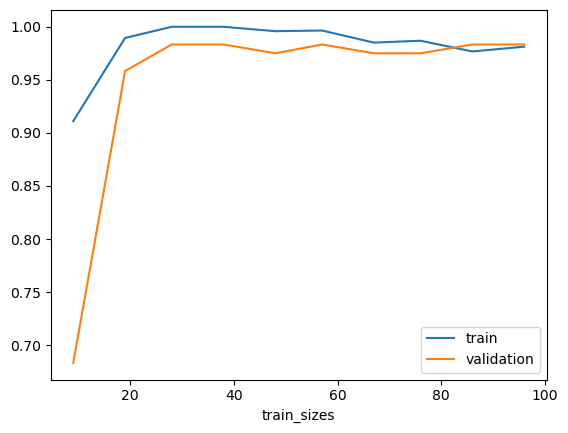

In [86]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes = np.linspace(0.1, 1.0, 10), cv=5)
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

In [79]:
# We can notice that the performance does not evolve anymore after more than 90 point in the dataset. This means that the model will stay flaten. Moreover, the probability to increase the performance with 200, 300 or  1000 data is very low
# This information can be useful in data collection. Indeed, this latter requires a lot of money. Instead of putting it in the reserach of data, it could be reorientate towards other activities.

array([0.2, 0.4, 0.6, 0.8, 1. ])